In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1U0jEuZLsufKyWdpUY4VVNvSRNFOG1g8C"})   # replace the id with id of file you want to access
downloaded.GetContentFile('consulta_cand_2020_BRASIL.csv')  

In [ ]:
downloaded = drive.CreateFile({'id':"1YC-sZUZQt2HNyI1IFbgUEfV72uHk4rjz"})   # replace the id with id of file you want to access
downloaded.GetContentFile('bem_candidato_2020_BRASIL.csv')  

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv('consulta_cand_2020_BRASIL.csv', sep = ';',encoding='latin-1')
dfcand = pd.DataFrame(data)
dfcand.drop(columns=['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'NR_CPF_CANDIDATO','DT_NASCIMENTO','NR_TITULO_ELEITORAL_CANDIDATO','NM_SOCIAL_CANDIDATO', 'NM_EMAIL', 'CD_TIPO_ELEICAO', 'NM_TIPO_ELEICAO', 'DT_ELEICAO', 'NR_TURNO'])

,CD_ELEICAO,DS_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,NR_IDADE_DATA_POSSE,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,426,Eleições Municipais 2020,MUNICIPAL,SP,64670,GUARAREMA,13,VEREADOR,250000930156,45454,CATIA PRAXEDES GUERIERO,CATIA PRAXEDES,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,45,PSDB,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,250000107165,PARTIDO ISOLADO,PSDB,1,BRASILEIRA NATA,SP,-3,SÃO PAULO,45,4,FEMININO,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),1,BRANCA,999,OUTROS,15526,-1,#NULO#,N,S,-1,6002393820206260319,-1,#NULO#,-1,#NULO#,SIM
1,426,Eleições Municipais 2020,MUNICIPAL,PA,4634,IGARAPÉ-AÇU,13,VEREADOR,140000771497,15400,ALINE DE NAZARÉ ANDRADE DAMASCENO,ALINE ANDRADE,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,15,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,140000074660,PARTIDO ISOLADO,MDB,1,BRASILEIRA NATA,PA,-3,IGARAPÉ-AÇU,30,4,FEMININO,8,SUPERIOR COMPLETO,3,CASADO(A),3,PARDA,402,"VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIA...",25592,-1,#NULO#,N,S,-1,6001822520206140005,-1,#NULO#,-1,#NULO#,SIM
2,426,Eleições Municipais 2020,MUNICIPAL,PA,4626,PLACAS,13,VEREADOR,140001068197,20059,ROSINEIA ALMEIDA ROZEK,ROSINEIA ROZEK,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,20,PSC,PARTIDO SOCIAL CRISTÃO,140000129169,PARTIDO ISOLADO,PSC,1,BRASILEIRA NATA,PA,-3,PLACAS,33,4,FEMININO,2,LÊ E ESCREVE,1,SOLTEIRO(A),1,BRANCA,230,PEDAGOGO,31317,-1,#NULO#,N,S,-1,6002455520206140068,-1,#NULO#,-1,#NULO#,SIM
3,426,Eleições Municipais 2020,MUNICIPAL,RN,18910,VÁRZEA,13,VEREADOR,200000899659,15777,JANILSON MIGUEL DA SILVA,JANILSINHO,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,15,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,200000102108,PARTIDO ISOLADO,MDB,1,BRASILEIRA NATA,RN,-3,VÁRZEA,38,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),3,PARDA,197,GARI OU LIXEIRO,26980,-1,#NULO#,N,S,-1,6001961720206200013,-1,#NULO#,-1,#NULO#,SIM
4,426,Eleições Municipais 2020,MUNICIPAL,MG,42218,CAMPINA VERDE,13,VEREADOR,130001010488,77077,JANETE NUNES FERREIRA,JANETE NUNES,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,77,SOLIDARIEDADE,SOLIDARIEDADE,130000118910,PARTIDO ISOLADO,SOLIDARIEDADE,1,BRASILEIRA NATA,MG,-3,CAMPINA VERDE,56,4,FEMININO,3,ENSINO FUNDAMENTAL INCOMPLETO,7,SEPARADO(A) JUDICIALMENTE,1,BRANCA,298,SERVIDOR PÚBLICO MUNICIPAL,42546,-1,#NULO#,N,S,-1,6000830520206130063,-1,#NULO#,-1,#NULO#,SIM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557399,426,Eleições Municipais 2020,MUNICIPAL,BA,37613,NOVA VIÇOSA,13,VEREADOR,50000818588,36444,DULCINO JOSÉ BONELLA BENACCHIO,BONELLA,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,36,PTC,PARTIDO TRABALHISTA CRISTÃO,50000085386,PARTIDO ISOLADO,PTC,1,BRASILEIRA NATA,ES,-3,ICONHA,57,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,9,DIVORCIADO(A),3,PARDA,257,EMPRESÁRIO,20141,-1,#NULO#,N,S,-1,6003378420206050035,-1,#NULO#,-1,#NULO#,SIM
557400,426,Eleições Municipais 2020,MUNICIPAL,PR,77674,PIRAÍ DO SUL,13,VEREADOR,160001255511,15111,BRUNA APARECIDA RIBEIRO DOS SANTOS,BRUNA SANTOS,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,15,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,160000158829,PARTIDO ISOLADO,MDB,1,BRASILEIRA NATA,PR,-3,PIRAÍ DO SUL,22,4,FEMININO,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),1,BRANCA,394,AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS,1230

In [ ]:
data2 = pd.read_csv('bem_candidato_2020_BRASIL.csv', sep = ';',encoding='latin-1', decimal=",")
dfpat = pd.DataFrame(data2)
dfpat

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
0,15/11/2020,17:10:20,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,64696,GUARATINGUETÁ,250000791162,6,95,Consórcio não contemplado,Uma cota do Consórcio SICOOB,8041.88,28/10/2020,14:13:03
1,15/11/2020,17:10:20,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,MG,46159,INGAÍ,130001106674,5,99,OUTROS BENS E DIREITOS,VACAS,32000.00,27/10/2020,18:20:17
2,15/11/2020,17:10:20,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RN,17795,PARNAMIRIM,200001186698,3,99,OUTROS BENS E DIREITOS,1 ¿ Empresa: Manuel Diniz Vidraçaria - ME ¿ CN...,20000.00,02/11/2020,19:26:55
3,15/11/2020,17:10:20,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,MG,52272,SÃO FRANCISCO DO GLÓRIA,130000690022,7,99,OUTROS BENS E DIREITOS,CAPITAL SOCIAL COOPERATIVA DE CREDITO DE LIVRE...,19459.23,28/10/2020,19:14:43
4,15/11/2020,17:10:20,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,RJ,59030,SÃO PEDRO DA ALDEIA,190000685940,4,79,Outros fundos,Saldo Aplicação Fundo Banco do Brasil,228644.78,27/10/2020,10:14:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011838,15/11/2020,17:10:20,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,PB,20559,JUAZEIRINHO,150001192215,2,21,"Veículo automotor terrestre: caminhão, automóv...",01 veiculo marca fiat siena 1.4. tetrafuel 201...,18000.00,27/10/2020,11:09:14
1011839,15/11/2020,17:10:20,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,BA,36412,ITIÚBA,50001001957,4,21,"Veículo automotor terrestre: caminhão, automóv...","Fiat Eco Sport, Banca, 20015",40000.00,28/10/2020,17:23:01
1011840,15/11/2020,17:10:20,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,MG,53236,SENHORA DOS REMÉDIOS,130000823856,3,21,"Veículo automotor terrestre: caminhão, automóv...",VW 1.0 ANO 2012,15000.00,27/10/2020,13:55:17
1011841,15/11/2020,17:10:20,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,MG,40452,ALVINÓPOLIS,130001106649,1,21,"Veículo automotor terrestre: caminhão, automóv...",Montana - Ano 212 - Placa OLP - 3023,20000.00,27/10/2020,15:48:38


In [ ]:
dfcand['Patrimonio'] = 0
for index,row in dfcand.iterrows():
  dfcand.at[index, 'Patrimonio'] = dfpat.loc[dfpat['SQ_CANDIDATO'] == row['SQ_CANDIDATO'], 'VR_BEM_CANDIDATO'].sum()

dfcand

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,Patrimonio
0,15/11/2020,17:11:25,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,SP,64670,GUARAREMA,13,VEREADOR,250000930156,45454,CATIA PRAXEDES GUERIERO,CATIA PRAXEDES,#NULO#,20608856800,POLITICAGMA2020@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,45,PSDB,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,250000107165,PARTIDO ISOLADO,PSDB,1,BRASILEIRA NATA,SP,-3,SÃO PAULO,23/03/1975,45,265751150124,4,FEMININO,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),1,BRANCA,999,OUTROS,15526,-1,#NULO#,N,S,-1,6002393820206260319,-1,#NULO#,-1,#NULO#,SIM,10000
1,15/11/2020,17:11:25,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,PA,4634,IGARAPÉ-AÇU,13,VEREADOR,140000771497,15400,ALINE DE NAZARÉ ANDRADE DAMASCENO,ALINE ANDRADE,#NULO#,1046076299,FLAVIOABREU1@HOTMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,15,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,140000074660,PARTIDO ISOLADO,MDB,1,BRASILEIRA NATA,PA,-3,IGARAPÉ-AÇU,22/09/1990,30,59597901392,4,FEMININO,8,SUPERIOR COMPLETO,3,CASADO(A),3,PARDA,402,"VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIA...",25592,-1,#NULO#,N,S,-1,6001822520206140005,-1,#NULO#,-1,#NULO#,SIM,0
2,15/11/2020,17:11:25,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,PA,4626,PLACAS,13,VEREADOR,140001068197,20059,ROSINEIA ALMEIDA ROZEK,ROSINEIA ROZEK,#NULO#,36787256,ROSINEIAALMEIDAROZEK@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,20,PSC,PARTIDO SOCIAL CRISTÃO,140000129169,PARTIDO ISOLADO,PSC,1,BRASILEIRA NATA,PA,-3,PLACAS,06/11/1987,33,55175351309,4,FEMININO,2,LÊ E ESCREVE,1,SOLTEIRO(A),1,BRANCA,230,PEDAGOGO,31317,-1,#NULO#,N,S,-1,6002455520206140068,-1,#NULO#,-1,#NULO#,SIM,160000
3,15/11/2020,17:11:25,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,RN,18910,VÁRZEA,13,VEREADOR,200000899659,15777,JANILSON MIGUEL DA SILVA,JANILSINHO,#NULO#,4913449451,JANILSONPUBLICIDADE@HOTMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,15,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,200000102108,PARTIDO ISOLADO,MDB,1,BRASILEIRA NATA,RN,-3,VÁRZEA,04/08/1982,38,19472371643,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),3,PARDA,197,GARI OU LIXEIRO,26980,-1,#NULO#,N,S,-1,6001961720206200013,-1,#NULO#,-1,#NULO#,SIM,56000
4,15/11/2020,17:11:25,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,MG,42218,CAMPINA VERDE,13,VEREADOR,130001010488,77077,JANETE NUNES FERREIRA,JANETE NUNES,#NULO#,59313374668,JANETENUNESFABRICIO@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,77,SOLIDARIEDADE,SOLIDARIEDADE,130000118910,PARTIDO ISOLADO,SOLIDARIEDADE,1,BRASILEIRA NATA,MG,-3,CAMPINA VERDE,31/12/1964,56,7690110281,4,FEMININO,3,ENSINO FUNDAMENTAL INCOMPLETO,7,SEPARADO(A) JUDICIALMENTE,1,BRANCA,298,SERVIDOR PÚBLICO MUNICIPAL,42546,-1,#NULO#,N,S,-1,6000830520206130063,-1,#NULO#,-1,#NULO#,SIM,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
dfnaomilio = dfcand[dfcand['Patrimonio'] < 1000000 ]
dfmilio = dfcand[dfcand['Patrimonio'] >= 1000000 ]
#Separando candidatos milionários dos que não são em duas df

# Comparando patrimônio de candidatos por gênero, etnia e escolaridade

Primeiramente, vamos comparar os gêneros dos candidatos, para termos uma ideia do quanto isso influencia no seu patrimônio:

In [ ]:
#Média por gênero dos não milionários
print("Média homens: " + str(dfnaomilio[dfnaomilio['DS_GENERO'] == 'MASCULINO']['Patrimonio'].mean()))
print("Média mulheres: " + str(dfnaomilio[dfnaomilio['DS_GENERO'] == 'FEMININO']['Patrimonio'].mean()))

Média homens: 105650.5952090437
Média mulheres: 62474.01342169417


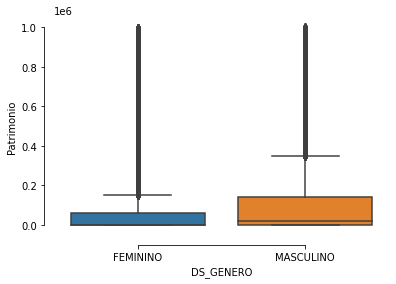

In [ ]:
sns.boxplot(x = 'DS_GENERO', y="Patrimonio",
            data=dfnaomilio)
sns.despine(offset=10, trim=True)

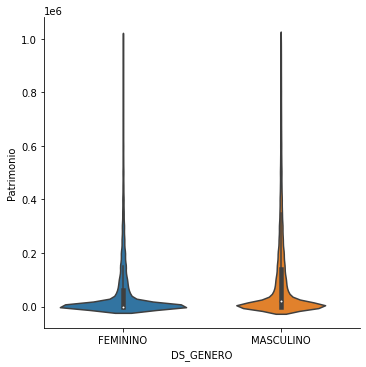

In [ ]:
sns.catplot(data=dfnaomilio, kind="violin", x="DS_GENERO", y="Patrimonio", split=True)

Observando as médias e os dois gráficos, que mostram a distribuição de patrimônio para candidatos não milionário, é fácil de ver que as mulheres possuem, em média, patrimônios consideravelmente menores, além de possuir uma proporção muito maior de candidatos que não declararam nenhum bem.

Vamos comparar agora a proporção de cada gênero em dois grupos: os milionários e os que não são:

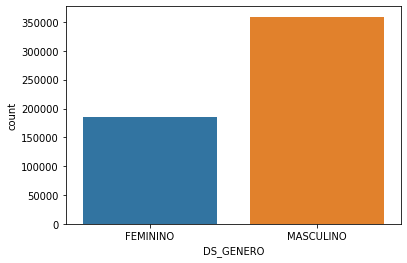

In [ ]:
#Candidatos não milionários
sns.countplot(x = 'DS_GENERO', data = dfnaomilio)

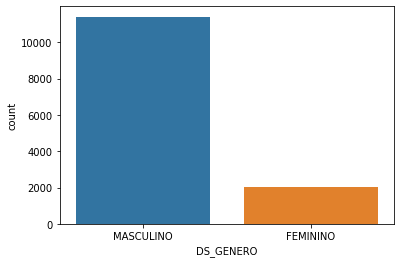

In [ ]:
#Candidatos milionários
sns.countplot(x = 'DS_GENERO', data = dfmilio)

Como podemos ver, a proporção de homens nos milionários é bem maior do que nos que não são, reforçando nossa descoberta que possuem uma quantidade de patrimônio bem maior que as candidatas.


---



De maneira semelhante, agora vamos comparar o patrimônio dos candidatos por etnia:

In [ ]:
print("Média indigenas: " + str(dfnaomilio[dfnaomilio['DS_COR_RACA'] == 'INDÍGENA']['Patrimonio'].mean()))
print("Média pretos: " + str(dfnaomilio[dfnaomilio['DS_COR_RACA'] == 'PRETA']['Patrimonio'].mean()))
print("Média pardos: " + str(dfnaomilio[dfnaomilio['DS_COR_RACA'] == 'PARDA']['Patrimonio'].mean()))
print("Média brancos: " + str(dfnaomilio[dfnaomilio['DS_COR_RACA'] == 'BRANCA']['Patrimonio'].mean()))
print("Média amarelos: " + str(dfnaomilio[dfnaomilio['DS_COR_RACA'] == 'AMARELA']['Patrimonio'].mean()))

Média indigenas: 27537.77153218495
Média pretos: 56238.75176270779
Média pardos: 72656.87764969419
Média brancos: 115096.57868947633
Média amarelos: 104312.56693333334


In [ ]:
#Fazendo uma df sem os candidatos sem informação
dfetnias = dfnaomilio[dfnaomilio['DS_COR_RACA'] != 'SEM INFORMAÇÃO']

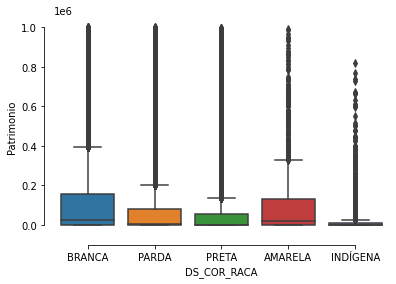

In [ ]:
sns.boxplot(x = 'DS_COR_RACA', y="Patrimonio",
            data=dfetnias)
sns.despine(offset=10, trim=True)

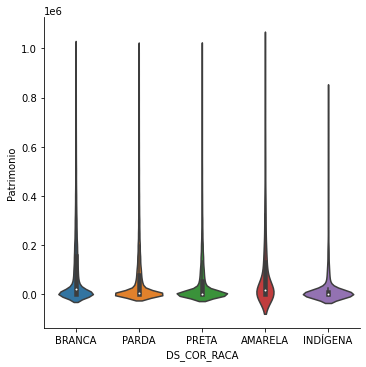

In [ ]:
sns.catplot(data=dfetnias, kind="violin", x="DS_COR_RACA", y="Patrimonio", split=True)

Observando os dois gráficos e as médias, vemos que os candidatos pardos, pretos e, principalmente, indígenas têm patrimônio menor que brancos e amarelos, além de terem uma maior proporção de candidatos que não declararam bem algum.

Agora, vamos comparar a distribuição por etnias dos candidatos com menos de um milhão com os candidatos milionários:

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

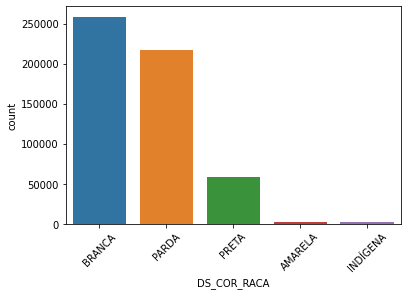

In [ ]:
#Distribuição dos candidatos com menos de um milhão por etnia:
sns.countplot(x = 'DS_COR_RACA', data = dfetnias)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

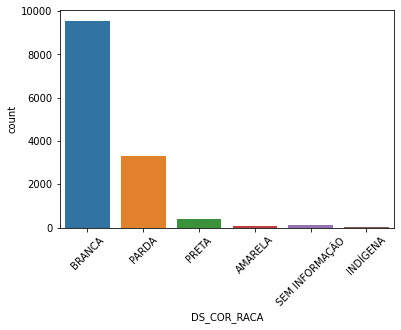

In [ ]:
#Distribuição dos candidatos milionários
sns.countplot(x = 'DS_COR_RACA', data = dfmilio)
plt.xticks(rotation = 45)

Como podemos ver, a proporção de brancos é muito maior no segundo grupo do que no primeiro. Além disso, a proporção de pardos e pretos cai bruscamente de um gráfico pra outro.

Todas essas análises feitas nos mostram a grande diferença de riquezas entre as etnias dos candidatos, algo que é um reflexo de toda a sociedade.


---



Analisaremos agora a diferença do patrimônio dos candidatos por escolaridade:

In [ ]:
#Médias dos não milionários por escolaridade
print("Media analfabetos: " + str(dfnaomilio[dfnaomilio['DS_GRAU_INSTRUCAO'] == 'ANALFABETO']['Patrimonio'].mean()))
print("Media le e escreve: " + str(dfnaomilio[dfnaomilio['DS_GRAU_INSTRUCAO'] == 'LÊ E ESCREVE']['Patrimonio'].mean()))
print("Media fundamental incompleto: " + str(dfnaomilio[dfnaomilio['DS_GRAU_INSTRUCAO'] == 'ENSINO FUNDAMENTAL INCOMPLETO']['Patrimonio'].mean()))
print("Media fundamental completo: " + str(dfnaomilio[dfnaomilio['DS_GRAU_INSTRUCAO'] == 'ENSINO FUNDAMENTAL COMPLETO']['Patrimonio'].mean()))
print("Media médio incompleto: " + str(dfnaomilio[dfnaomilio['DS_GRAU_INSTRUCAO'] == 'ENSINO MÉDIO INCOMPLETO']['Patrimonio'].mean()))
print("Media médio completo: " + str(dfnaomilio[dfnaomilio['DS_GRAU_INSTRUCAO'] == 'ENSINO MÉDIO COMPLETO']['Patrimonio'].mean()))
print("Media superior incompleto: " + str(dfnaomilio[dfnaomilio['DS_GRAU_INSTRUCAO'] == 'SUPERIOR INCOMPLETO']['Patrimonio'].mean()))
print("Media superior completo: " + str(dfnaomilio[dfnaomilio['DS_GRAU_INSTRUCAO'] == 'SUPERIOR COMPLETO']['Patrimonio'].mean()))

Media analfabetos: 13466.666666666666
Media le e escreve: 64303.91014091014
Media fundamental incompleto: 75004.03651309229
Media fundamental completo: 74822.14048340624
Media médio incompleto: 65495.78063712013
Media médio completo: 75954.96053814232
Media superior incompleto: 80126.42191713655
Media superior completo: 143593.24400585023


Enquanto os seis grupos do meio possuem médias parecidas, com variância pequena, a diferença entre os analfabetos e os que leem e escrevem é significativa, mais de 6 vezes. Também é uma grande discrepância entre os candidatos com ensino superior incompleto com aqueles que o concluíram, quase 2 vezes maior.

Também é possível tirar essa conclusão observando o seguinte gráfico boxplot:

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

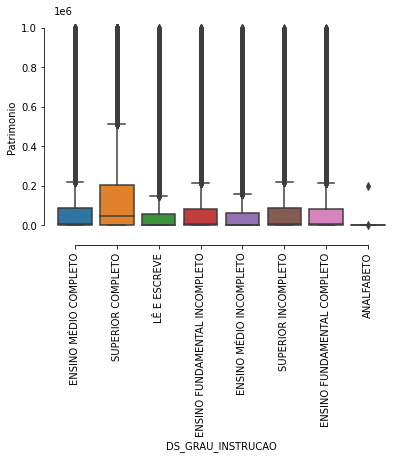

In [ ]:
sns.boxplot(x = 'DS_GRAU_INSTRUCAO', y="Patrimonio",
            data=dfnaomilio)
sns.despine(offset=10, trim=True)
plt.xticks(rotation = 90)

Enquanto a imensa maioria dos analfabetos não possuem patrimônio algum, é visível como os que possuem ensino superior possuem patrimônios maiores, visto sua grande distância interquartil (IQR) e seu alto limite superior.


Vamos comparar agora a proporção de milionários por grupo:


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

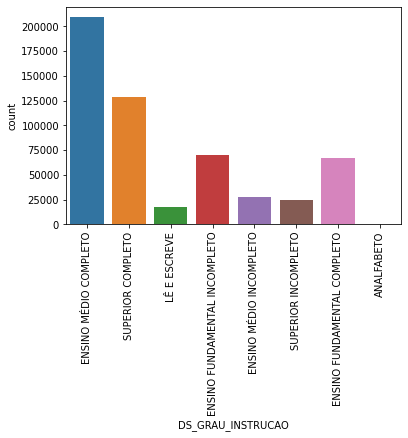

In [ ]:
#Quantidade de candidatos por escolaridade (não milionários)
sns.countplot(x = 'DS_GRAU_INSTRUCAO', data = dfnaomilio)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

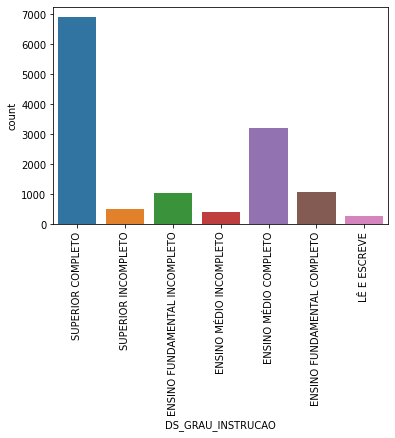

In [ ]:
#Quantidade de candidatos por escolaridade (milionários)
sns.countplot(x = 'DS_GRAU_INSTRUCAO', data = dfmilio)
plt.xticks(rotation = 90)

Como podemos ver, a proporção de candidatos com ensino superior concluído cresce de forma significativa de um gráfico para outro, mostrando que esse grupo realmente tem uma quantidade patrimônio bem maior comparado aos outros.

# Análise do patrimônio de candidatos que estão disputado reeleição ou não

Agora, vamos comparar os candidatos que estão tentando uma reeleição com os que não estão, para descobrirmos o quanto isso influencia no patrimônio que possuem:

In [ ]:
dfsre = dfcand[dfcand['ST_REELEICAO'] == 'S']
dfnre = dfcand[dfcand['ST_REELEICAO'] == 'N']
#Separando os candidatos em duas df diferentes

Primeiramente, vamos ver a quantidade de candidatos em cada grupo:

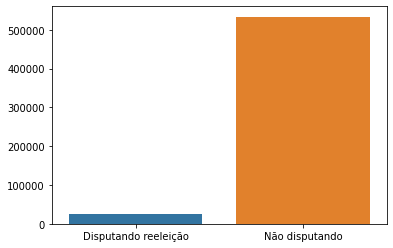

In [ ]:
tamanho = [len(dfsre.index), len(dfnre.index)]
label = ['Disputando reeleição', 'Não disputando']
sns.barplot(x = label, y = tamanho)

In [ ]:
print(100 * len(dfsre.index) / (len(dfsre.index) + len(dfnre.index)))

4.308544610372369


Como podemos ver, os candidatos disputando reeleição estão em uma quantidade muito menor do que os que não estão, apenas 4,3%.

Agora, vamos ver a diferença no patrimônio dos dois grupos:

In [ ]:
print(dfsre['Patrimonio'].median())
print(dfnre['Patrimonio'].median())

92000.0
11318.0


Observando a mediana dos grupos, vemos que o candidato médio disputando reeleição possui um patrimônio mais de 8 vezes maior que o que não está disputando, uma diferença notável.

Vamos ver agora o gráfico de distribuição do patrimônio dos dois grupos, para aqueles que possuem menos de um milhão de reais:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


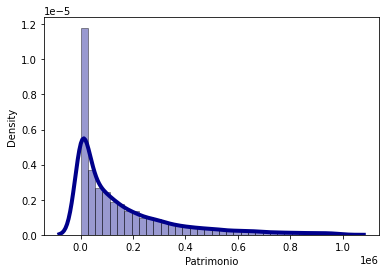

In [ ]:
sns.distplot(dfsre['Patrimonio'][dfsre['Patrimonio'] < 1000000], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


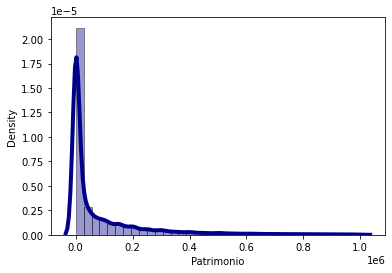

In [ ]:
sns.distplot(dfnre['Patrimonio'][dfnre['Patrimonio'] < 1000000], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Olhando os gráficos dos dois grupos, é fácil notar que a proporção de candidatos que não declararam nenhum bem é razoavelmente maior nos que não disputam reeleição. Além disso, o segundo gráfico "cai" bruscamente, ou seja, em todas as outras faixas de patrimônio, a proporção dos que não estão disputando a reeleição é consideravelmente maior do que no primeiro grupo.

Por último, vamos separar analisar apenas os milionários nos dois grupos:

In [ ]:
dfmiliosre = dfsre[dfsre['Patrimonio'] > 1000000]
dfmilionre = dfnre[dfnre['Patrimonio'] > 1000000]

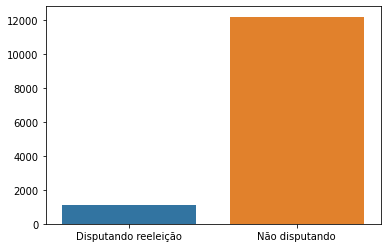

In [ ]:
tamanho = [len(dfmiliosre.index), len(dfmilionre.index)]
label = ['Disputando reeleição', 'Não disputando']
sns.barplot(x = label, y = tamanho)

In [ ]:
print(100 * len(dfmiliosre.index) / (len(dfmiliosre.index) + len(dfmilionre.index)))

8.122171945701357


Como podemos ver, nos milionários, a taxa de candidatos disputando reeleição é 8,12%, quase o dobro do que a dos candidatos gerais.

Com tudo isso observado, é fácil afirmar que os candidatos disputando reeleição são, em geral, consideravelmente mais ricos que os que não são, algo que, inevitavelmente, facilita com que sejam eleitos novamente, pois podem gastar mais nas suas campanhas.


---



# **Análise Total**

In [ ]:
candidatos = pd.read_csv('consulta_cand_2020_BRASIL.csv', encoding='latin-1', sep=";")

In [ ]:
candidatos.loc[candidatos['NM_CANDIDATO'] == 'SIMONE MARIA DOS SANTOS FARIAS', 'NR_IDADE_DATA_POSSE'] = 48

In [ ]:
df_remove = candidatos.loc[(candidatos['DS_SITUACAO_CANDIDATURA'] == 'INAPTO')]
candidatos.drop(df_remove.index, inplace=True)

In [ ]:
candidatos.drop_duplicates(['NR_CPF_CANDIDATO','NR_TITULO_ELEITORAL_CANDIDATO'], inplace=True)

In [ ]:
class Analisar():
    def __init__(self, candidatos_array, nomes_colunas): 
        self.candidatos = candidatos_array #array do nicho escolhio Ex: candidatos da PB, candidatos eleitos
        self.nomes_colunas = nomes_colunas #nome das  colunas do dataframe em forma de array
        
    def Serie(self, colunas): # recebe quais colunas você quer analisar
        serie = {} # dicionario, o qual ficam os dados das colunas escolhidas
        
        for candidato in self.candidatos: # percorre o array dos candidatos                         
            for coluna in colunas:
                if self.nomes_colunas[coluna] not in serie:
                    serie[self.nomes_colunas[coluna]] = {}
                    serie[self.nomes_colunas[coluna]][candidato[coluna]] = 1

                else:
                    if candidato[coluna] not in serie[self.nomes_colunas[coluna]]:
                        serie[self.nomes_colunas[coluna]][candidato[coluna]] = 1
                    else:
                        serie[self.nomes_colunas[coluna]][candidato[coluna]] += 1
                    
        return serie

In [ ]:
analisar = candidatos.loc[:, :].values

In [ ]:
nacional = Analisar(analisar, candidatos.columns)
turno1 = nacional.Serie([2, 15, 23, 21, 28, 10, 20])

In [ ]:
titulos = ['Distribuição dos Cargos', 'Número de Candidatos por Estado de Origem - ZZ: Exterior',
           'Distribuição das Cores Autodeclaradas pelos Candidatos','Distribuição do Grau de Instrução dos Candidatos',
           'Número de Candidatos que Declaram Bens ou Não', 'Número de  Candidatos por Partido',
          'Distribuição dos Gêneros Autodeclarados pelos Candidatos']

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

sns.set_style('darkgrid')

In [ ]:
for pos, chave in enumerate(turno1):
    
    serie = pd.Series(turno1[chave])
    plt.figure(figsize=(20, 8))
    grafico = serie.plot(kind='bar', color=[cm.twilight(x) for x in range(100,255,20)])
    grafico.set_title(titulos[pos])
    grafico.set_ylabel('Número de Candidatos')
    plt.xticks(rotation= 60)
    
    maior = sorted(turno1[chave], key=turno1[chave].get, reverse=True)
    grafico.legend([f'{maior[0]} :{turno1[chave][maior[0]]/len(analisar):.2f}%'])

    for barra in grafico.patches:
      y = barra.get_height()
      x = barra.get_x() + barra.get_width() /2
      grafico.annotate(f'{y}',xy = (x, y), xytext=(0, 3), textcoords="offset points",ha='center', va='bottom')

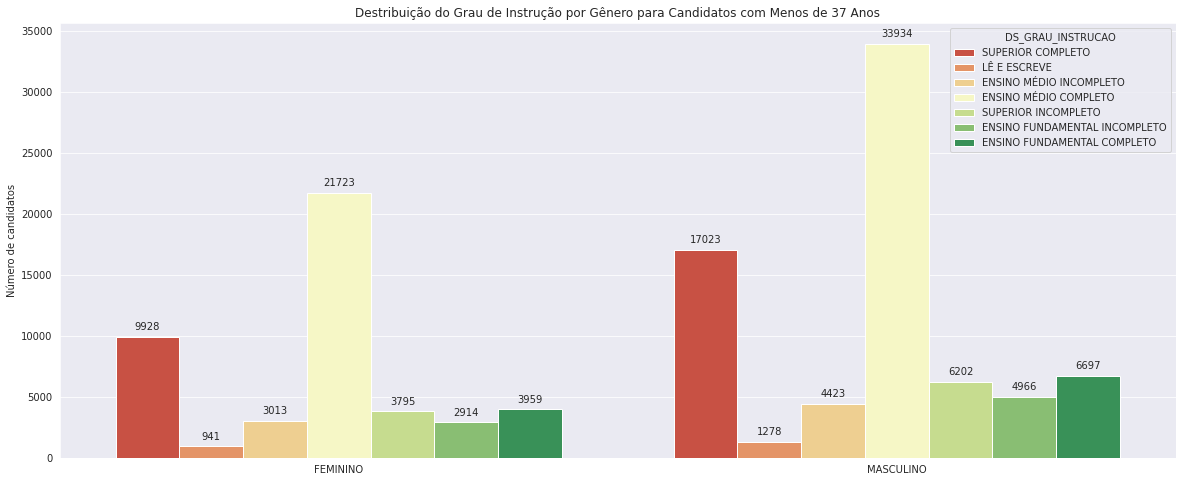

In [ ]:
plt.figure(figsize=(20,8))

count1 = sns.countplot(data = candidatos.loc[candidatos['NR_IDADE_DATA_POSSE'] < candidatos['NR_IDADE_DATA_POSSE'].quantile(q=0.25)],
            x = "DS_GENERO", hue="DS_GRAU_INSTRUCAO", palette='RdYlGn')

for p in count1.patches:
    count1.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title("Destribuição do Grau de Instrução por Gênero para Candidatos com Menos de 37 Anos")
plt.xlabel(" ")
plt.ylabel("Número de candidatos")

plt.show()

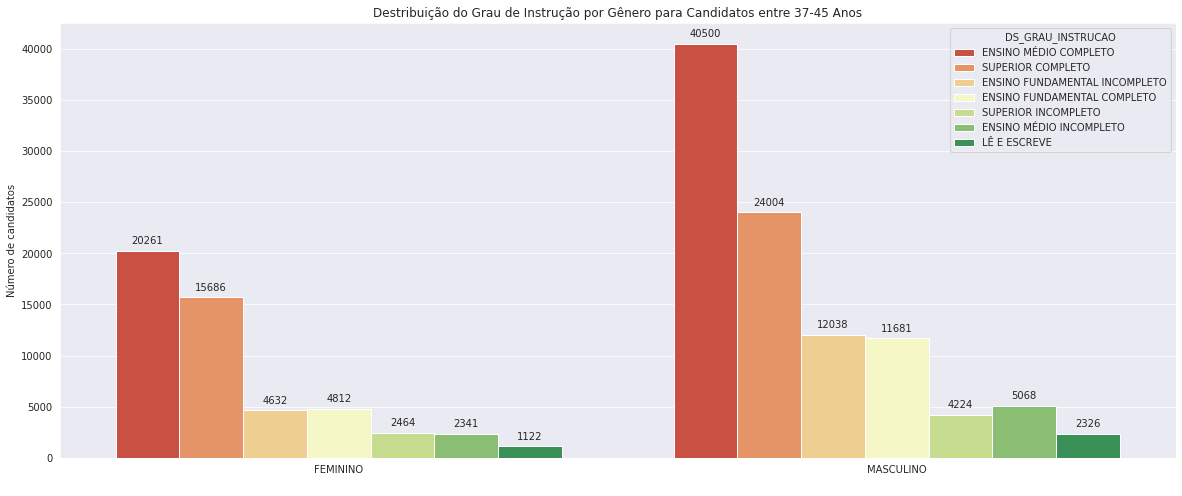

In [ ]:
plt.figure(figsize=(20,8))

count1 = sns.countplot(data = candidatos.loc[(candidatos['NR_IDADE_DATA_POSSE'] >= candidatos['NR_IDADE_DATA_POSSE'].quantile(q=0.25)) & 
            (candidatos['NR_IDADE_DATA_POSSE'] <= candidatos['NR_IDADE_DATA_POSSE'].quantile(q=0.50))],
            x = "DS_GENERO", hue="DS_GRAU_INSTRUCAO", palette='RdYlGn')

for p in count1.patches:
    count1.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title("Destribuição do Grau de Instrução por Gênero para Candidatos entre 37-45 Anos")
plt.xlabel(" ")
plt.ylabel("Número de candidatos")

plt.show()

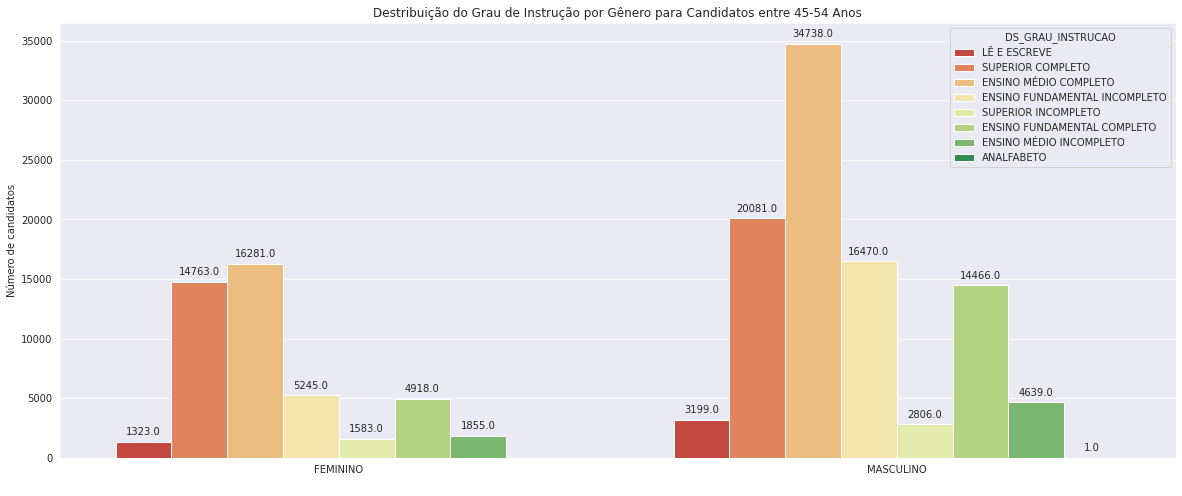

In [ ]:
plt.figure(figsize=(20,8))

count1 = sns.countplot(data = candidatos.loc[(candidatos['NR_IDADE_DATA_POSSE'] > candidatos['NR_IDADE_DATA_POSSE'].quantile(q=0.50)) & 
            (candidatos['NR_IDADE_DATA_POSSE'] <= candidatos['NR_IDADE_DATA_POSSE'].quantile(q=0.75))],
            x = "DS_GENERO", hue="DS_GRAU_INSTRUCAO", order=['FEMININO', 'MASCULINO'], palette='RdYlGn')

for p in count1.patches:
    count1.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.title("Destribuição do Grau de Instrução por Gênero para Candidatos entre 45-54 Anos")
plt.xlabel(" ")
plt.ylabel("Número de candidatos")

plt.show()

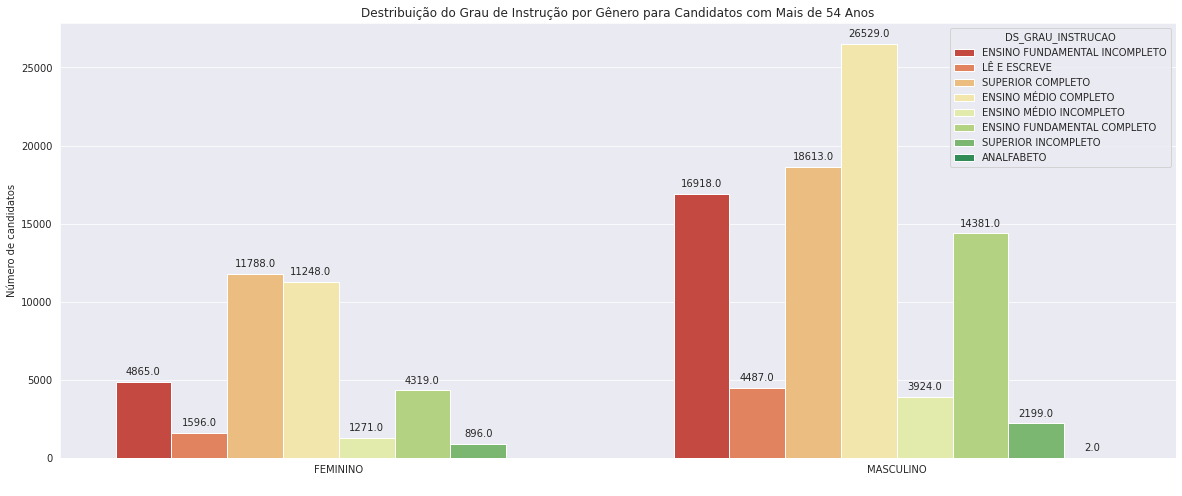

In [ ]:
plt.figure(figsize=(20,8))

count1 = sns.countplot(data = candidatos.loc[candidatos['NR_IDADE_DATA_POSSE'] > candidatos['NR_IDADE_DATA_POSSE'].quantile(q=0.75)],
            x = "DS_GENERO", hue="DS_GRAU_INSTRUCAO", palette='RdYlGn')

for p in count1.patches:
    count1.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title("Destribuição do Grau de Instrução por Gênero para Candidatos com Mais de 54 Anos")
plt.xlabel(" ")
plt.ylabel("Número de candidatos")

plt.show()

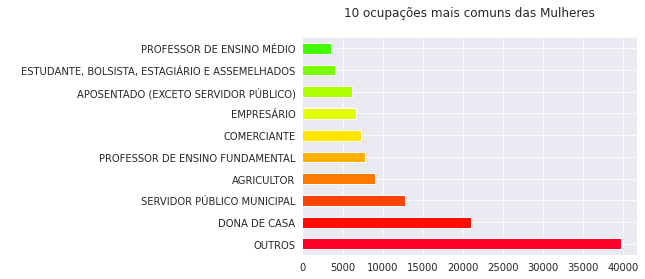

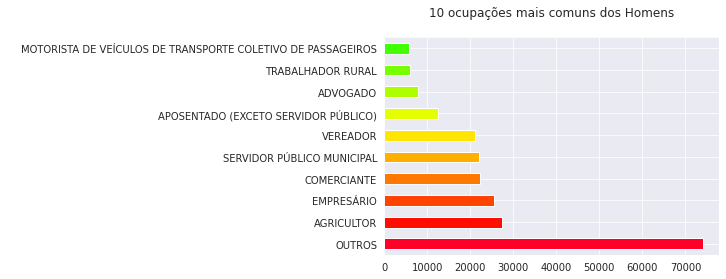

In [ ]:
from matplotlib.pyplot import cm

dict_genero = dict(zip(candidatos['DS_GENERO'].unique(), ['das Mulheres','dos Homens']))

for genero, desc_genero in dict_genero.items():
    
    plt.figure(figsize=(13,7))
    ca = candidatos[(candidatos['DS_GENERO']==genero)]['DS_OCUPACAO'].value_counts().nlargest(10).plot(kind = 'barh', color = [cm.gist_rainbow(x) for x in range(0,101,10)])
    
    for p in ca.patches:
        ca.annotate("{:.3f}%".format(p.get_width()/len(candidatos[(candidatos['DS_GENERO']==genero)])), (p.get_width(), p.get_y()), ha = 'center', va = 'center', xytext = (17, 8), textcoords = 'offset points')

    plt.title('10 Ocupações Mais Comuns {}\n'.format(desc_genero))
    plt.ylabel(' ')
    
    plt.show()

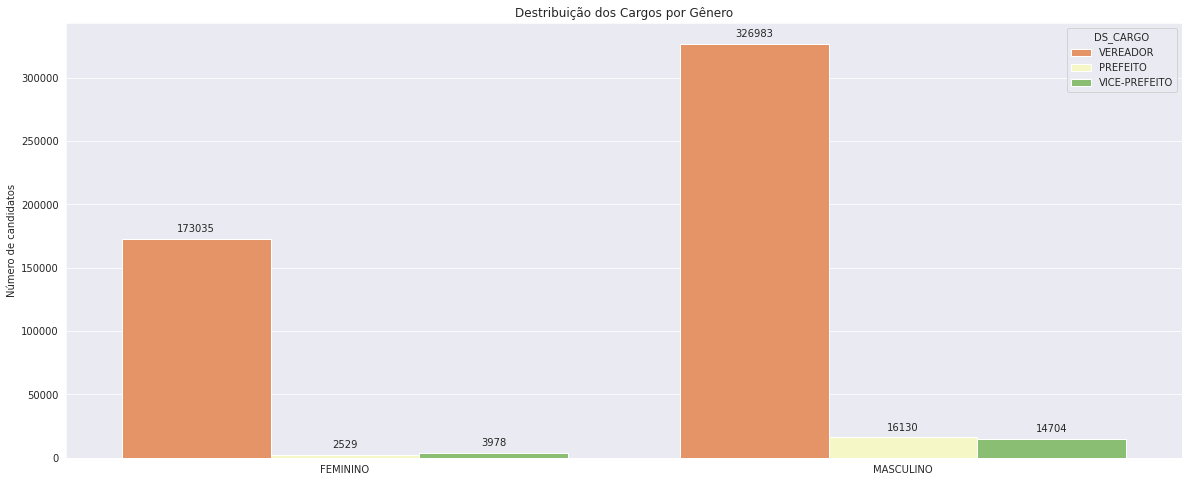

In [ ]:
plt.figure(figsize=(20,8))

count2 = sns.countplot(data = candidatos,
            x = "DS_GENERO", hue="DS_CARGO", palette='RdYlGn')

for p in count2.patches:
    count2.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title("Destribuição dos Cargos por Gênero")
plt.xlabel(" ")
plt.ylabel("Número de candidatos")

plt.show()

# **Analise de Gastos de campanha**

In [ ]:
dfcand.head()

In [ ]:
dfcand['Patrimonio'].value_counts()

0         217682
5000        5076
10000       4749
20000       4678
50000       4595
           ...  
279997         1
271793         1
349599         1
345501         1
136381         1
Name: Patrimonio, Length: 81997, dtype: int64

In [ ]:
dfcand['VR_DESPESA_MAX_CAMPANHA'].value_counts()

 12308      199550
-1           19725
 123077      11042
 3675197      2002
 1594577      1811
             ...  
 298164          1
 179453          1
 287055          1
 162953          1
 333634          1
Name: VR_DESPESA_MAX_CAMPANHA, Length: 3698, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição de Volume de despesa')

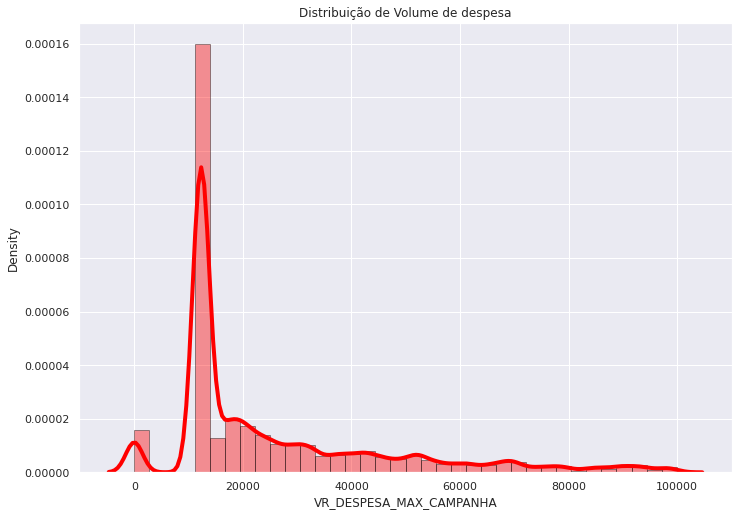

In [ ]:


sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dfcand['VR_DESPESA_MAX_CAMPANHA'][dfcand['VR_DESPESA_MAX_CAMPANHA'] < 100000], hist=True, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set_title("Distribuição de Volume de despesa")

In [ ]:
#Maior Patrimônio acumulado registrado para um candidato

maior_pat = max(dfcand['Patrimonio'])
maior_pat

5668883099

In [ ]:
#Maior Despesa Máxima Disponível para um candidato
#Para ter como base em fazer a engenharia de dados e a divisão dos intervalos

maior_desp = max(dfcand['VR_DESPESA_MAX_CAMPANHA'])
maior_desp

51799384

In [ ]:
#Cópia para trabalhar nela e não mudar o original

dfcand['intervalo_despesa'] = dfcand['VR_DESPESA_MAX_CAMPANHA'].copy()
dfcand['intervalo_despesa']

0         15526
1         25592
2         31317
3         26980
4         42546
          ...  
557399    20141
557400    12308
557401    12308
557402    87466
557403    12308
Name: intervalo_despesa, Length: 557404, dtype: int64

In [ ]:
#Engenharia de Dados
#Criação de um novo atributo, transformando dados numéricos bem esparsos em intervalos.

dfcand['intervalo_despesa'].mask(dfcand['VR_DESPESA_MAX_CAMPANHA'] <= 150000, '<=150k', inplace=True)
dfcand['intervalo_despesa'].mask((dfcand['VR_DESPESA_MAX_CAMPANHA'] > 150000) & (dfcand['VR_DESPESA_MAX_CAMPANHA'] <= 800000), '>150k e <= 800k', inplace=True)
dfcand['intervalo_despesa'].mask((dfcand['VR_DESPESA_MAX_CAMPANHA'] > 800000) & (dfcand['VR_DESPESA_MAX_CAMPANHA'] <= 1200000), '>800k e <= 1.2kk', inplace=True)
dfcand['intervalo_despesa'].mask((dfcand['VR_DESPESA_MAX_CAMPANHA'] > 1200000) & (dfcand['VR_DESPESA_MAX_CAMPANHA'] <= 2000000), '>1.2kk e <= 2kk', inplace=True)
dfcand['intervalo_despesa'].mask(dfcand['VR_DESPESA_MAX_CAMPANHA'] > 2000000, '>2kk', inplace=True)

dfcand['intervalo_despesa']

0         <=150k
1         <=150k
2         <=150k
3         <=150k
4         <=150k
           ...  
557399    <=150k
557400    <=150k
557401    <=150k
557402    <=150k
557403    <=150k
Name: intervalo_despesa, Length: 557404, dtype: object

In [ ]:
dfcand['intervalo_despesa'].value_counts()

<=150k              493275
>150k e <= 800k      56392
>1.2kk e <= 2kk       3069
>2kk                  2791
>800k e <= 1.2kk      1877
Name: intervalo_despesa, dtype: int64

Text(0.5, 1.0, 'Média orçamentária de campanha')

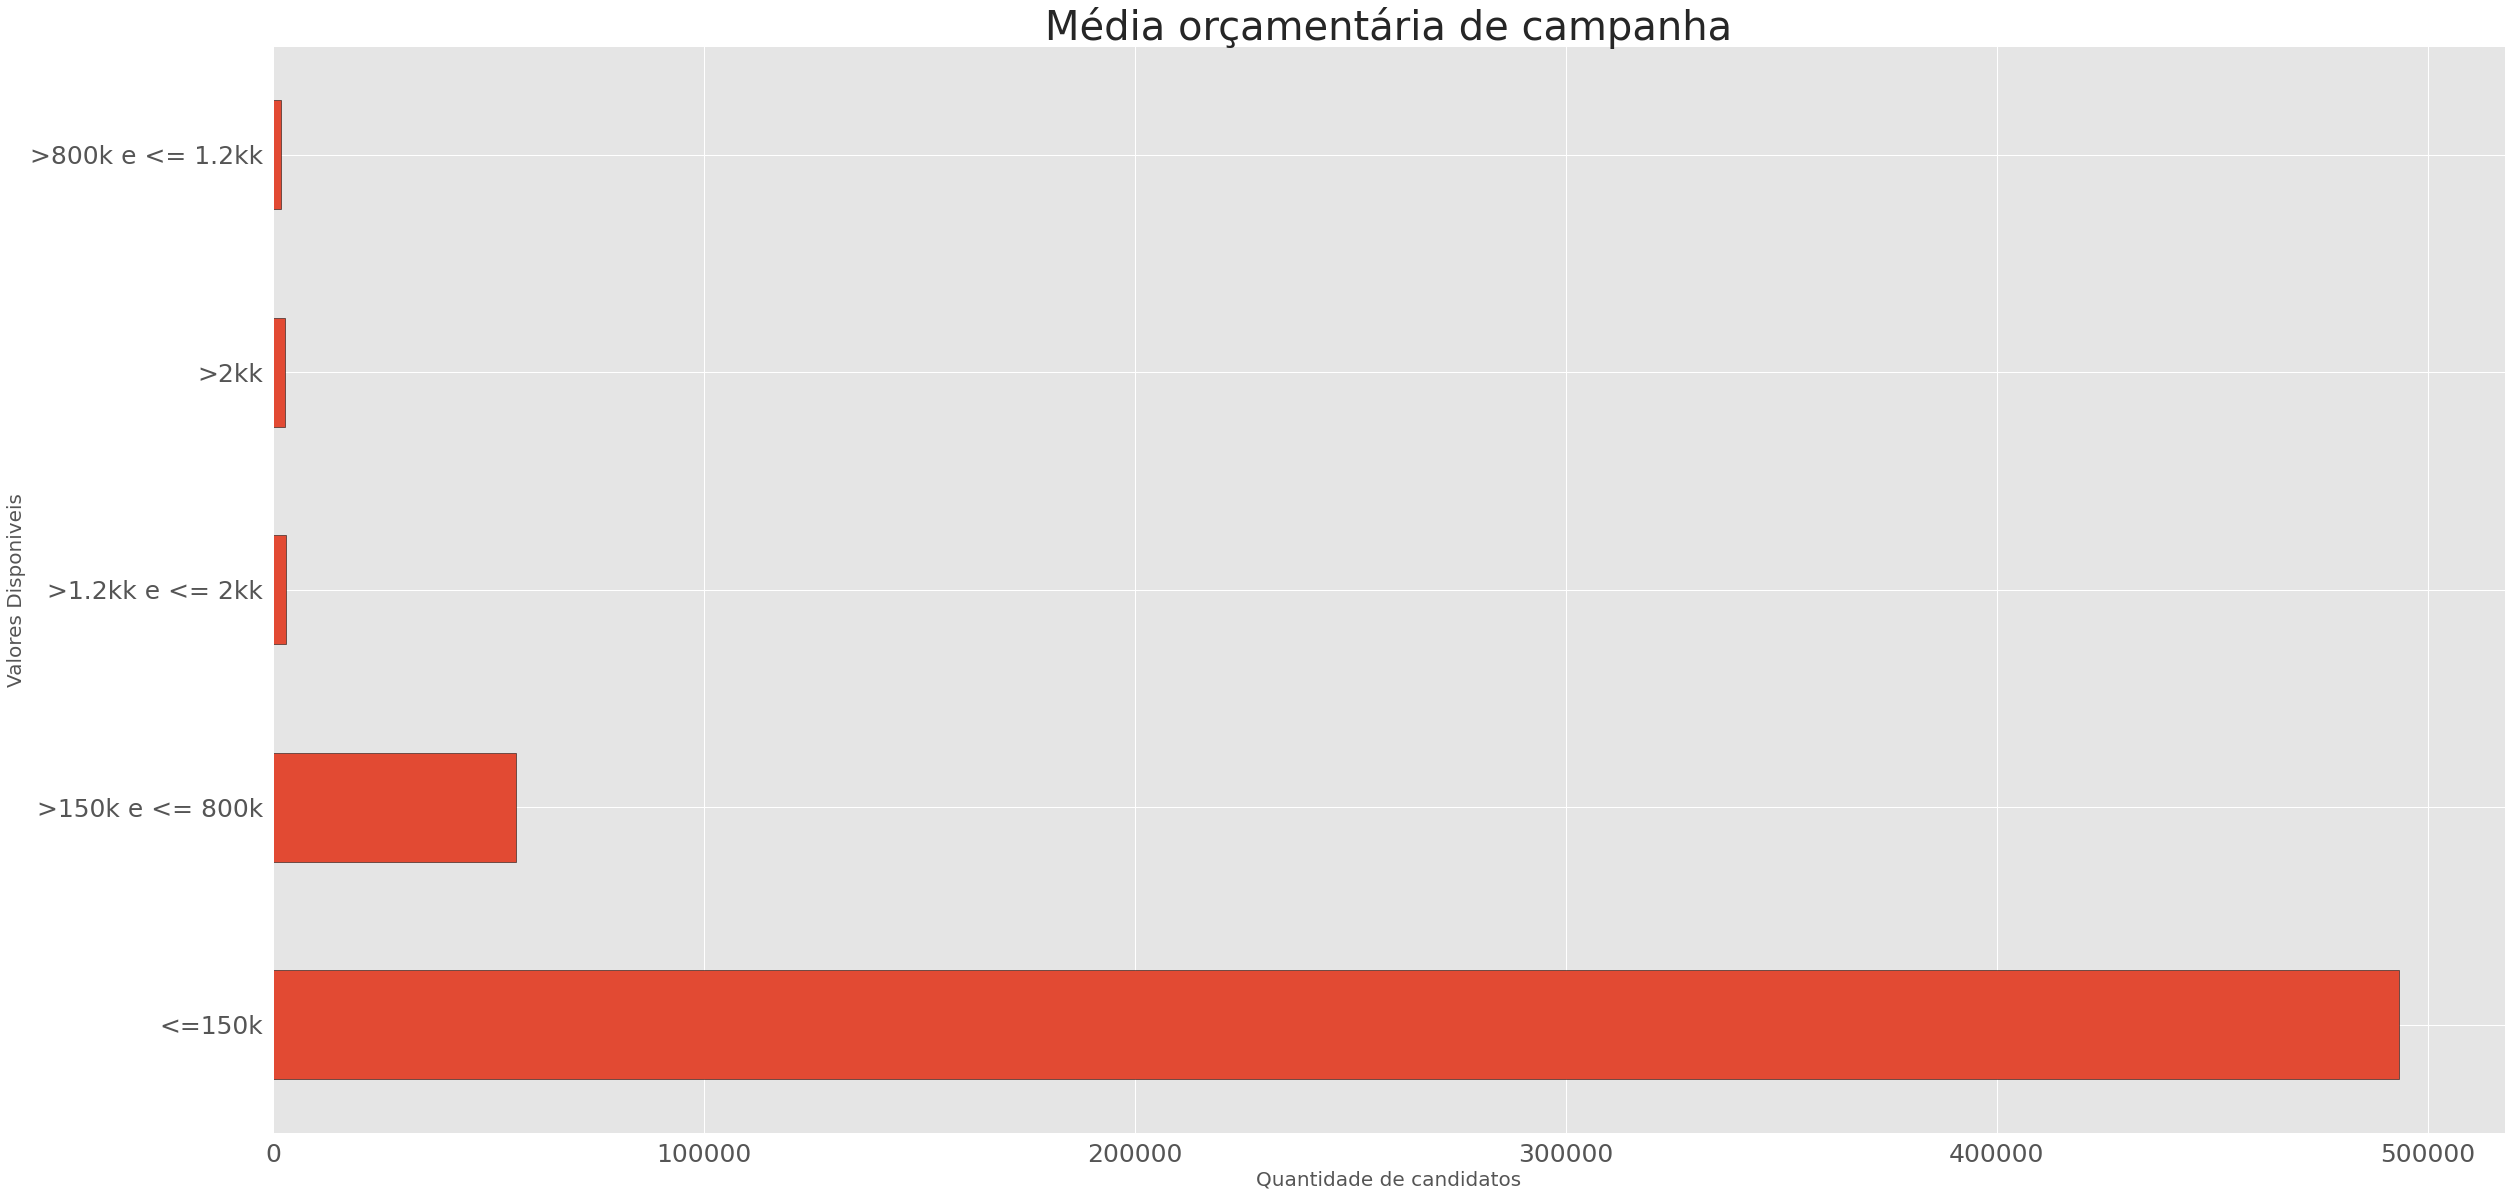

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(40,20))
plt.xticks(fontsize= 25)
plt.yticks(fontsize= 25)
plt.ylabel('Valores Disponiveis', fontsize = 20)
plt.xlabel('Quantidade de candidatos',fontsize = 20)
dfcand["intervalo_despesa"].value_counts().plot.barh(edgecolor='black')
plt.title('Média orçamentária de campanha',fontsize=40)

[]

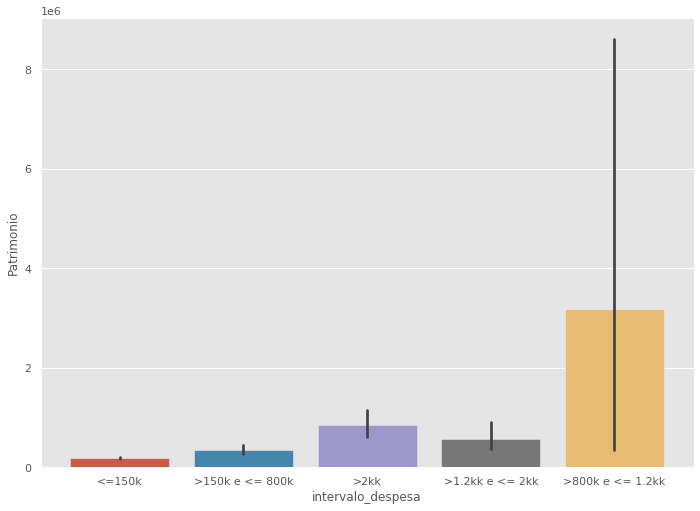

In [ ]:
#Gráfico de Barra: Intervalo da Despesa Máxima para Campanha X Valor do Patrimônio Total do Candidato
#Dessa forma é possível ver que candidatos que possuem altas despesas (não são as maiores, mas são consideradas altas) entre 800 mil e 1.2 milhão
#também possuem um alto patromônio acumulado, uma média de 3.5 milhão, porém com algumas variantes fora da barra que vai até a mais de 10 milhões

g = sns.barplot(data=dfcand, x= dfcand['intervalo_despesa'], y= dfcand['Patrimonio'])
g.plot()

In [ ]:
#Transformação dos intervalos em dados numéricos apenas para tirar a correlação
dfcand['intervalo_despesa_num'] = dfcand['intervalo_despesa'].copy()
dfcand['intervalo_despesa_num'].replace(['<=150k', '>150k e <= 800k', '>2kk', '>1.2kk e <= 2kk', '>800k e <= 1.2kk'], [0,1,4,3,2], inplace=True)
dfcand['intervalo_despesa_num']

0         0
1         0
2         0
3         0
4         0
         ..
557399    0
557400    0
557401    0
557402    0
557403    0
Name: intervalo_despesa_num, Length: 557404, dtype: int64

In [ ]:
#Realocando o atributo de patrimonio para o final da tabela para pegar com o iloc 
dfcand['Patrimonio_realoc'] = dfcand['Patrimonio'].copy()

In [ ]:
#Maior Patrimônio acumulado registrado para um candidato

maior_pat = max(dfcand['Patrimonio'])
maior_pat

5668883099

In [ ]:
#Engenharia de Dados na questão do Patrimônio

dfcand['intervalo_patrimonio'] = dfcand['Patrimonio'].copy()

dfcand['intervalo_patrimonio'].mask(dfcand['Patrimonio'] <= 50000, '<=50k', inplace=True)
dfcand['intervalo_patrimonio'].mask((dfcand['Patrimonio'] > 50000) & (dfcand['Patrimonio'] <= 150000), '>50k e <= 150k', inplace=True)
dfcand['intervalo_patrimonio'].mask((dfcand['Patrimonio'] > 150000) & (dfcand['Patrimonio'] <= 500000), '>150k e <= 500k', inplace=True)
dfcand['intervalo_patrimonio'].mask((dfcand['Patrimonio'] > 500000) & (dfcand['Patrimonio'] <= 1000000), '>500k e <= 1kk', inplace=True)
dfcand['intervalo_patrimonio'].mask((dfcand['Patrimonio'] > 1000000) & (dfcand['Patrimonio'] <= 5000000), '>1kk e <= 5kk', inplace=True)
dfcand['intervalo_patrimonio'].mask((dfcand['Patrimonio'] > 5000000) & (dfcand['Patrimonio'] <= 10000000), '>5kk e <= 10kk', inplace=True)
dfcand['intervalo_patrimonio'].mask(dfcand['Patrimonio'] > 10000000, '>10kk', inplace=True)

dfcand['intervalo_patrimonio']

0                   <=50k
1                   <=50k
2         >150k e <= 500k
3          >50k e <= 150k
4                   <=50k
               ...       
557399     >50k e <= 150k
557400              <=50k
557401              <=50k
557402     >500k e <= 1kk
557403              <=50k
Name: intervalo_patrimonio, Length: 557404, dtype: object

In [ ]:
#Transformação dos intervalos em dados numéricos apenas para tirar a correlação

dfcand['intervalo_patrimonio_num'] = dfcand['intervalo_patrimonio'].copy()

dfcand['intervalo_patrimonio_num'].replace(['<=50k', '>50k e <= 150k', '>150k e <= 500k', '>500k e <= 1kk', '>1kk e <= 5kk', '>5kk e <= 10kk', '>10kk'], [0,1,2,3,4,5,6], inplace=True)
dfcand['intervalo_patrimonio_num']

0         0
1         0
2         2
3         1
4         0
         ..
557399    1
557400    0
557401    0
557402    3
557403    0
Name: intervalo_patrimonio_num, Length: 557404, dtype: int64

In [ ]:
dfcand['intervalo_despesa_num_realoc'] = dfcand['intervalo_despesa_num'].copy()
dfcand['intervalo_despesa_num_realoc']

0         0
1         0
2         0
3         0
4         0
         ..
557399    0
557400    0
557401    0
557402    0
557403    0
Name: intervalo_despesa_num_realoc, Length: 557404, dtype: int64

In [ ]:
#Pegando um dataframe apenas com os dois atributos para checar correlação

atribute_correl = dfcand.iloc[:, 68:70]
atribute_correl

,intervalo_patrimonio_num,intervalo_despesa_num_realoc
0,0,0
1,0,0
2,2,0
3,1,0
4,0,0
...,...,...
557399,1,0
557400,0,0
557401,0,0
557402,3,0


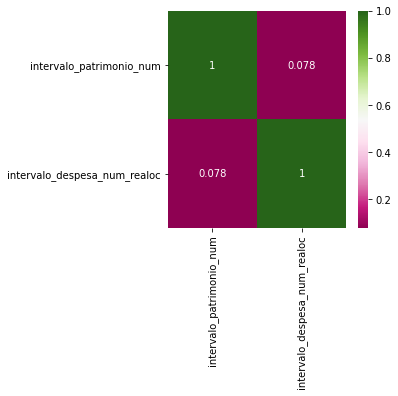

In [ ]:
#Correlação entre despesa máxima disponível e patrimõnio total declarado

fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(atribute_correl.corr(), annot=True, cmap="PiYG",  ax=ax)

In [ ]:
#Maior Patrimônio acumulado registrado para um candidato

maior_pat = max(dfcand['Patrimonio'])
maior_pat

5668883099